# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.105667e+01     7.545298e+00
 * time: 0.0016140937805175781
     1     2.881637e+01     4.939941e+00
 * time: 0.007621049880981445
     2     1.904058e+01     3.686778e+00
 * time: 0.01441812515258789
     3     1.343499e+01     2.368229e+00
 * time: 0.020017147064208984
     4     1.150469e+01     2.682334e+00
 * time: 0.0253140926361084
     5     1.112855e+01     2.142958e+00
 * time: 0.030364036560058594
     6     9.709195e+00     1.485614e+00
 * time: 0.03563117980957031
     7     8.708915e+00     1.482922e+00
 * time: 0.041294097900390625
     8     8.376056e+00     9.644681e-01
 * time: 0.04645419120788574
     9     8.192957e+00     6.218328e-01
 * time: 0.05145907402038574
    10     8.083100e+00     5.990744e-01
 * time: 0.056220054626464844
    11     8.022014e+00     5.946895e-01
 * time: 0.060645103454589844
    12     7.984222e+00     4.819444e-01
 * time: 0.06509613990783691
    13     7.944552e+00     4.088920e-01
 

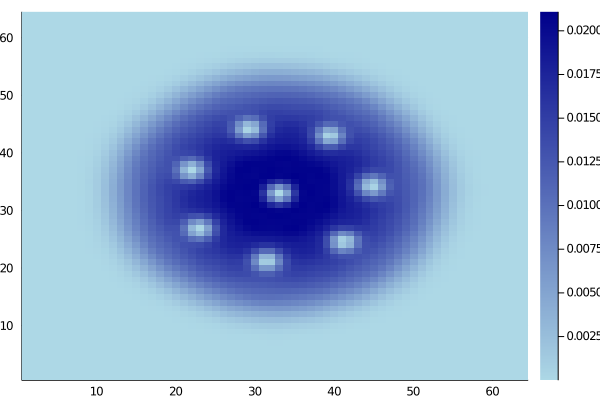

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)